### Import necessary libraries

In [36]:
import os
import boto3
import json
import numpy as np
runtime = boto3.Session().client(service_name='runtime.sagemaker') 

### Define model endpoints

In [73]:
no_tl = 'birdsong-no-tl-mel-e10-mb8-sz224-ep--2022-08-01-23-57-40'

## Validation Data - No Transfer Learning

### Run validation on the No Transfer Learning Endpoint

In [99]:
#iterate thru the validate folder 
class_true = []
class_pred_no_tl = []
validate_path = "../data/mel-spectrogram/validate"
for subdir, dirs, files in os.walk(validate_path):
    for file in files:
        file_path = os.path.join(subdir, file)
        base = os.path.basename(file)
        extension = os.path.splitext(base)[1]
        if extension == '.png' and ".ipynb_checkpoints" not in file_path:
            class_true.append(file_path.split('/')[-2])
            with open(file_path, 'rb') as fspec:
                payload = fspec.read()
                payload = bytearray(payload)
            response = runtime.invoke_endpoint(EndpointName=no_tl, 
                                       ContentType='application/x-image', 
                                       Body=payload)
            result = response['Body'].read()
            result = json.loads(result)
            index = np.argmax(result)
            inference_categories = ['eastern-whipbird', 'kookaburra','willie-wagtail']
            #print("Result: label - " + inference_categories[index] + ", probability - " + str(result[index]))
            class_pred_no_tl.append(inference_categories[index])    

### Visualise results on a Confusion Matrix

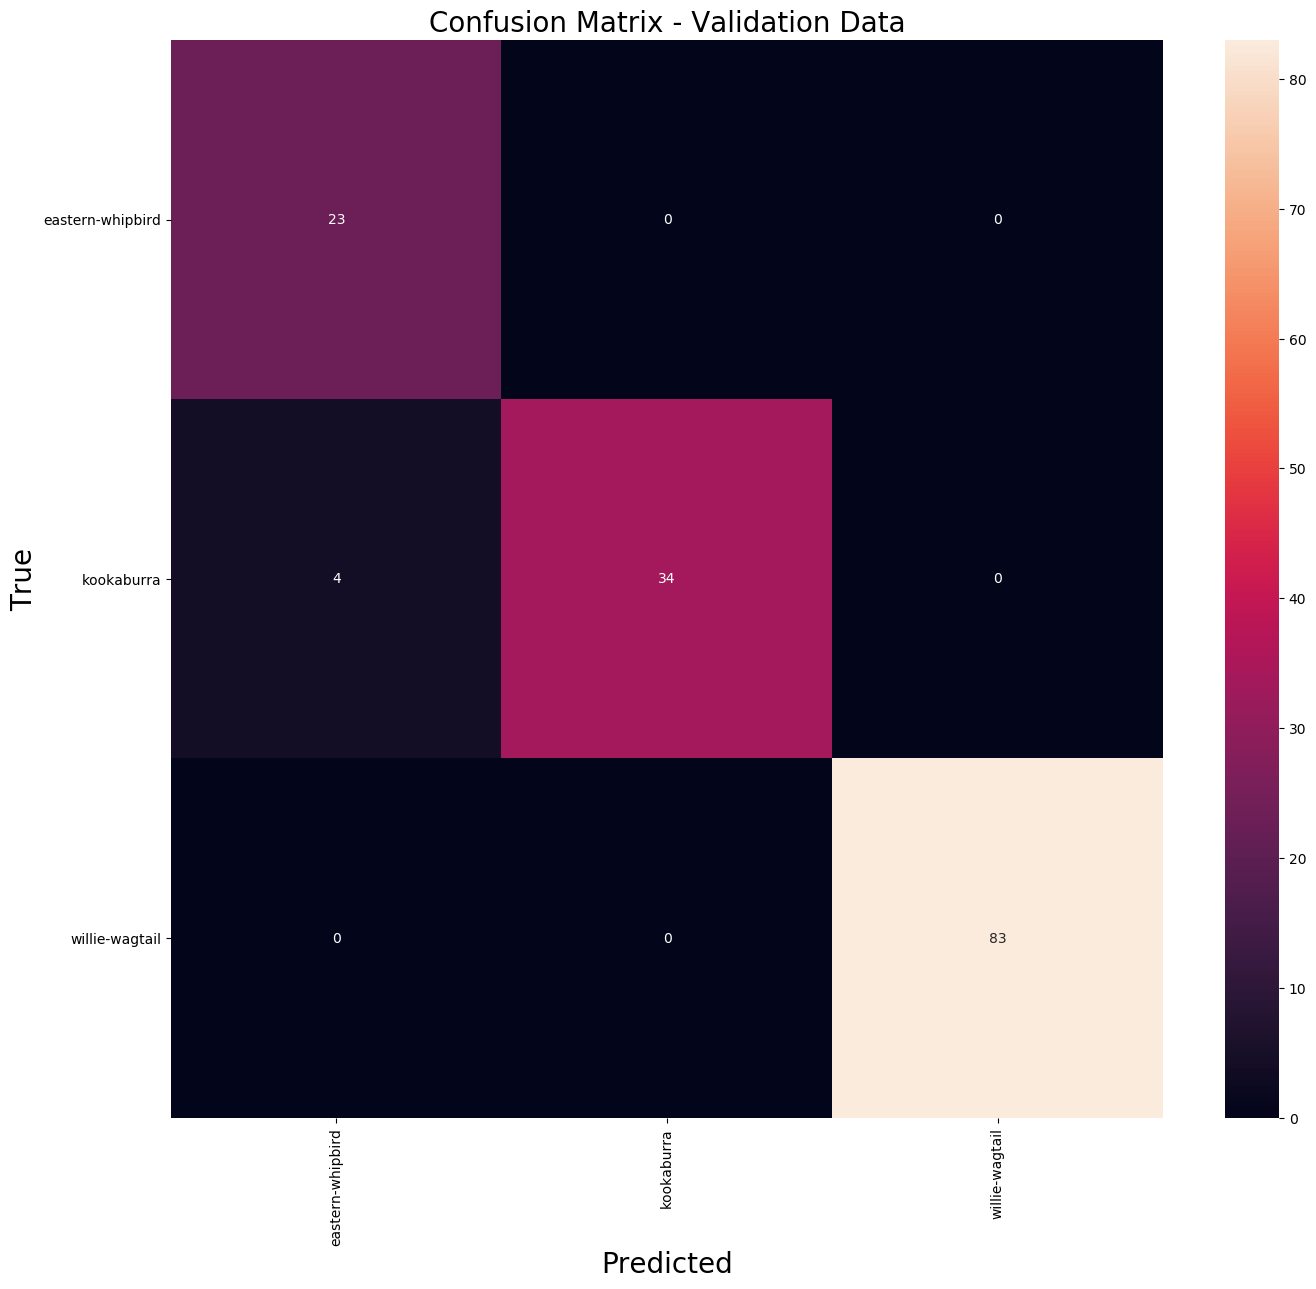

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(class_true, class_pred_no_tl)

class_names = ['eastern-whipbird', 'kookaburra', 'willie-wagtail']

fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix - Validation Data', fontsize=20)

plt.savefig('../presentation/ConMat-No-TL-val-152layers.png')
plt.show()

### Calculate Accuracy Score

In [101]:
from sklearn.metrics import accuracy_score

print(accuracy_score(class_true, class_pred_no_tl))

0.9722222222222222


## Run thorugh the TEST data set 
This consists of 5 clips of each species

In [85]:
no_tl ="birdsong-no-tl-mel-e30-mb8-layers152-ep--2022-08-02-04-10-40"

In [102]:
#iterate thru the validate folder 
class_true = []
class_pred_test = []
class_names = ['eastern-whipbird', 'kookaburra','willie-wagtail']

test_path = "../data/test/mel-spectrogram"
for subdir, dirs, files in os.walk(validate_path):
    for file in files:
        file_path = os.path.join(subdir, file)
        base = os.path.basename(file)
        extension = os.path.splitext(base)[1]
        if extension == '.png' and ".ipynb_checkpoints" not in file_path:
            class_true.append(file_path.split('/')[-2])
            with open(file_path, 'rb') as fspec:
                payload = fspec.read()
                payload = bytearray(payload)
            response = runtime.invoke_endpoint(EndpointName=no_tl, 
                                       ContentType='application/x-image', 
                                       Body=payload)
            result = response['Body'].read()
            result = json.loads(result)
            index = np.argmax(result)
            inference_categories = ['eastern-whipbird', 'kookaburra', 'willie-wagtail']
            #print("Result: label - " + inference_categories[index] + ", probability - " + str(result[index]))
            class_pred_test.append(inference_categories[index])    

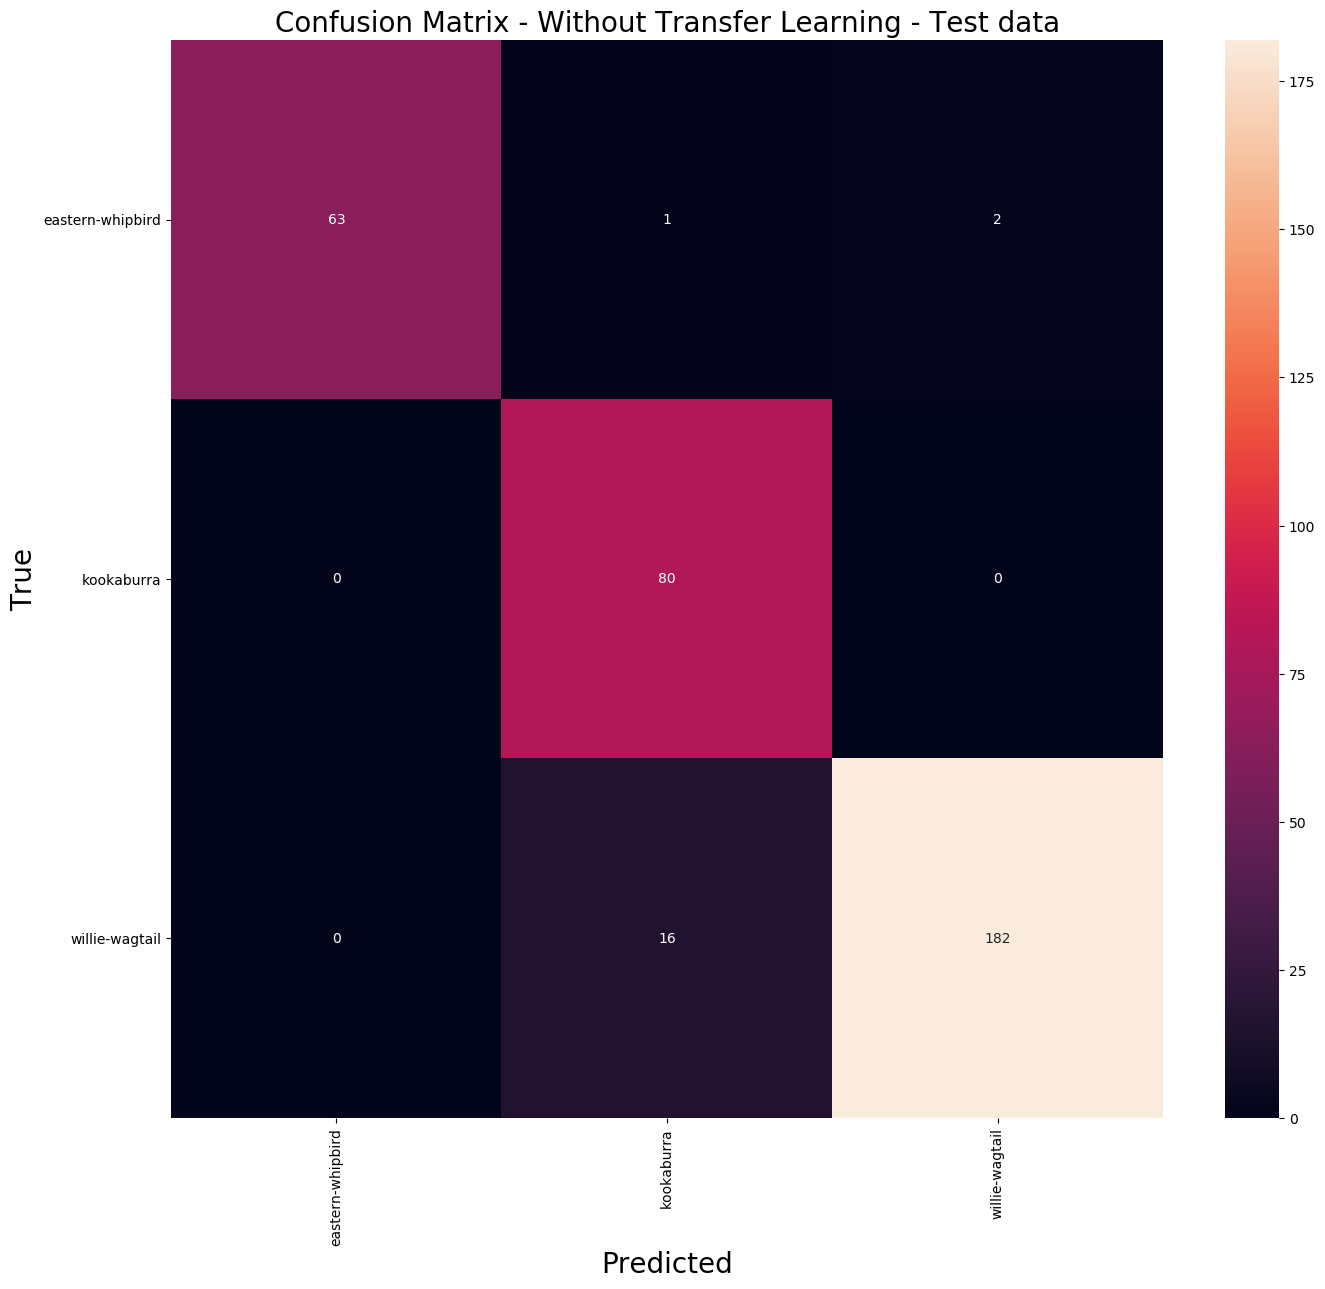

In [97]:
cm_test = confusion_matrix(class_true, class_pred_test)

fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm_test, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Confusion Matrix - Test Data', fontsize=20)

plt.savefig('../presentation/ConMat-No-TL-test.png')
plt.show()

In [98]:
print(accuracy_score(class_true, class_pred_no_tl))

0.9447674418604651
